In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# set loads and reading

data = pd.read_csv('Sub_Oil_VLCC_Monthly.csv')


In [67]:
print(data.columns)

Index(['Unnamed: 0', '542644', '548869', '93219', '534737', '36820', '542661',
       '10066', '542456', '24820',
       ...
       '543880+543332+542784+530997+530785',
       '535034+535038+542800+543348+543896', '543924+543376+542828+535086',
       '542832+542696+543380+543928', '543932+542700+542836+543384',
       '547724+543360+547728+543908+547720+542812+547716+531033',
       '543888+542792+543340+531025',
       '543372+543368+543920+543916+542692+542688+542824+542820',
       '543364+543912+542684+542816',
       '8852013+8852220+10743960+10778824+10778836+10743901+10778899+10779132'],
      dtype='object', length=464)


In [68]:
# Assuming 'target_column' is the column containing the target values
X = data.drop('542236', axis=1)
y = data['542236']

In [69]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# dontchange
X_train = X.iloc[:36]
y_train = y.iloc[:36]
X_test = X.iloc[36:]
y_test = y.iloc[36:]

In [70]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
#model = LinearRegression()


from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), Ridge(alpha=0.1))

In [71]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])

In [72]:
# Make predictions
y_pred = model.predict(X_test)

In [73]:
# Calculate the accuracy (you can use other metrics depending on your task)
# dont change
accuracy = 100 * (1-abs((y_test - y_pred)/ y_test))

In [76]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)


# Print the accuracy and mean squared error
print("Accuracy:", accuracy.mean())
print("Mean Squared Error:", mse)

Accuracy: 82.88328136533089
Mean Squared Error: 100269143.14827263


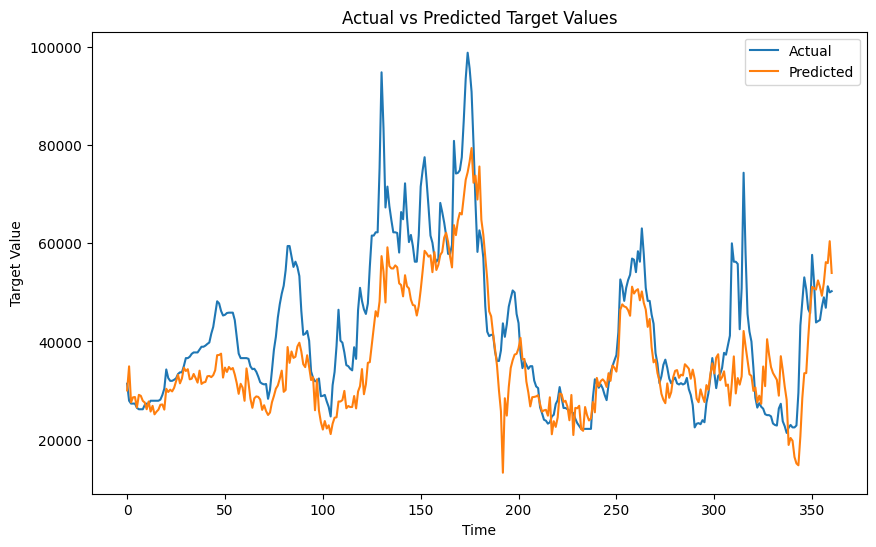

In [75]:
# Visualization with line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.xlabel('Time')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Target Values')

plt.legend()
plt.show()